<img src="data_and_images/undp-2.jpg" style="float: left; margin: 20px; height: 55px">


### Experimenting with line plots, using gender inequality data from the UN Development Programme. 

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#nifty imports to plot labels in-line
from labellines import labelLine, labelLines


mpl.rcParams['font.sans-serif'] = "Helvetica"
mpl.rcParams['font.family'] = "sans-serif"

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
data = pd.read_csv('data_and_images/gender-inequality-index-from-the-human-development-report.csv')

Gender inequality remains a major barrier to human development. Girls and women have made major strides since 1990, but they have not yet gained gender equity. The disadvantages facing women and girls are a major source of inequality. All too often, women and girls are discriminated against in health, education, political representation, labour market, etc.—with negative consequences for development of their capabilities and their freedom of choice.

The GII is an inequality index. It measures gender inequalities in three important aspects of human development—reproductive health, measured by maternal mortality ratio and adolescent birth rates; empowerment, measured by proportion of parliamentary seats occupied by females and proportion of adult females and males aged 25 years and older with at least some secondary education; and economic status, expressed as labour market participation and measured by labour force participation rate of female and male populations aged 15 years and older. 

<b>The GII measures the human development costs of gender inequality. Thus the higher the GII value the more disparities between females and males and the more loss to human development.</b>



Source: [United Nations Development Programme](http://hdr.undp.org/en/content/gender-inequality-index-gii)

In [5]:
data.head()

,Entity,Code,Year,Gender Inequality Index (Human Development Report (2015)) ((index score))
0,Afghanistan,AFG,2005,0.739
1,Afghanistan,AFG,2010,0.724
2,Afghanistan,AFG,2011,0.713
3,Afghanistan,AFG,2012,0.701
4,Afghanistan,AFG,2013,0.689


In [6]:
data.columns = ['Entity', 'Code', 'Year', 'Index']

In [7]:
print(data.shape)

(1292, 4)


In [8]:
years = list(data.Year.unique())
years.sort()
#the data spans a number of years, but is only reported annually from 2010 
years

[1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015]

In [9]:
df = data[['Entity', 'Index', 'Year']]

In [10]:
# re-grouping the data for ease of plotting 

df.groupby(['Year', 'Entity']).mean().unstack()

Index                                                      \
Entity Afghanistan Albania Algeria Argentina Armenia Australia Austria   
Year                                                                     
1995           NaN     NaN   0.680     0.431   0.471     0.180   0.187   
2000           NaN   0.381   0.627     0.422   0.467     0.160   0.151   
2005         0.739   0.332   0.561     0.374   0.406     0.139   0.118   
2010         0.724   0.273   0.523     0.370   0.344     0.138   0.111   
2011         0.713   0.279   0.514     0.367   0.338     0.133   0.105   
2012         0.701   0.281   0.432     0.366   0.317     0.131   0.100   
2013         0.689   0.272   0.429     0.364   0.308     0.124   0.087   
2014         0.676   0.267   0.429     0.364   0.299     0.123   0.083   
2015         0.667   0.267   0.429       NaN   0.293     0.120   0.078   

                                   ...                                      \
Entity Azerbaijan Bahamas Bahrain  ... United Arab Emirates United Kingdom   
Year                               ...                                       
1995          NaN     NaN     NaN  ...                0.643          0.237   
2000          NaN   0.385     NaN  ...                0.609          0.215   
2005        0.324   0.358   0.331  ...                0.591          0.206   
2010        0.317   0.383   0.241  ...                0.231          0.184   
2011        0.319   0.381   0.225  ...                0.246          0.174   
2012        0.319   0.377   0.225  ...                0.247          0.168   
2013        0.324   0.372   0.220  ...                0.247          0.159   
2014        0.330   0.370   0.224  ...                0.247          0.149   
2015        0.326   0.362   0.233  ...                0.232          0.131   

                                                                         \
Entity United States Uruguay Uzbekistan Venezuela Vietnam  Yemen Zambia   
Year                                                                      
1995           0.305   0.440        NaN     0.547   0.383    NaN  0.625   
2000             NaN   0.389        NaN       NaN   0.347  0.814  0.626   
2005           0.264   0.373        NaN     0.470   0.317  0.791  0.593   
2010           0.254   0.327        NaN     0.469   0.324  0.779  0.553   
2011           0.248   0.326        NaN     0.468   0.328  0.772  0.556   
2012           0.235   0.320        NaN     0.466   0.331  0.767  0.550   
2013           0.227   0.320      0.279     0.466   0.333  0.762  0.544   
2014           0.214   0.317      0.279     0.463   0.334  0.757  0.541   
2015           0.203   0.284      0.287     0.461   0.337  0.767  0.526   

                 
Entity Zimbabwe  
Year             
1995      0.598  
2000      0.631  
2005      0.589  
2010      0.581  
2011      0.575  
2012      0.569  
2013      0.532  
2014      0.535  
2015      0.540  

[9 rows x 160 columns]

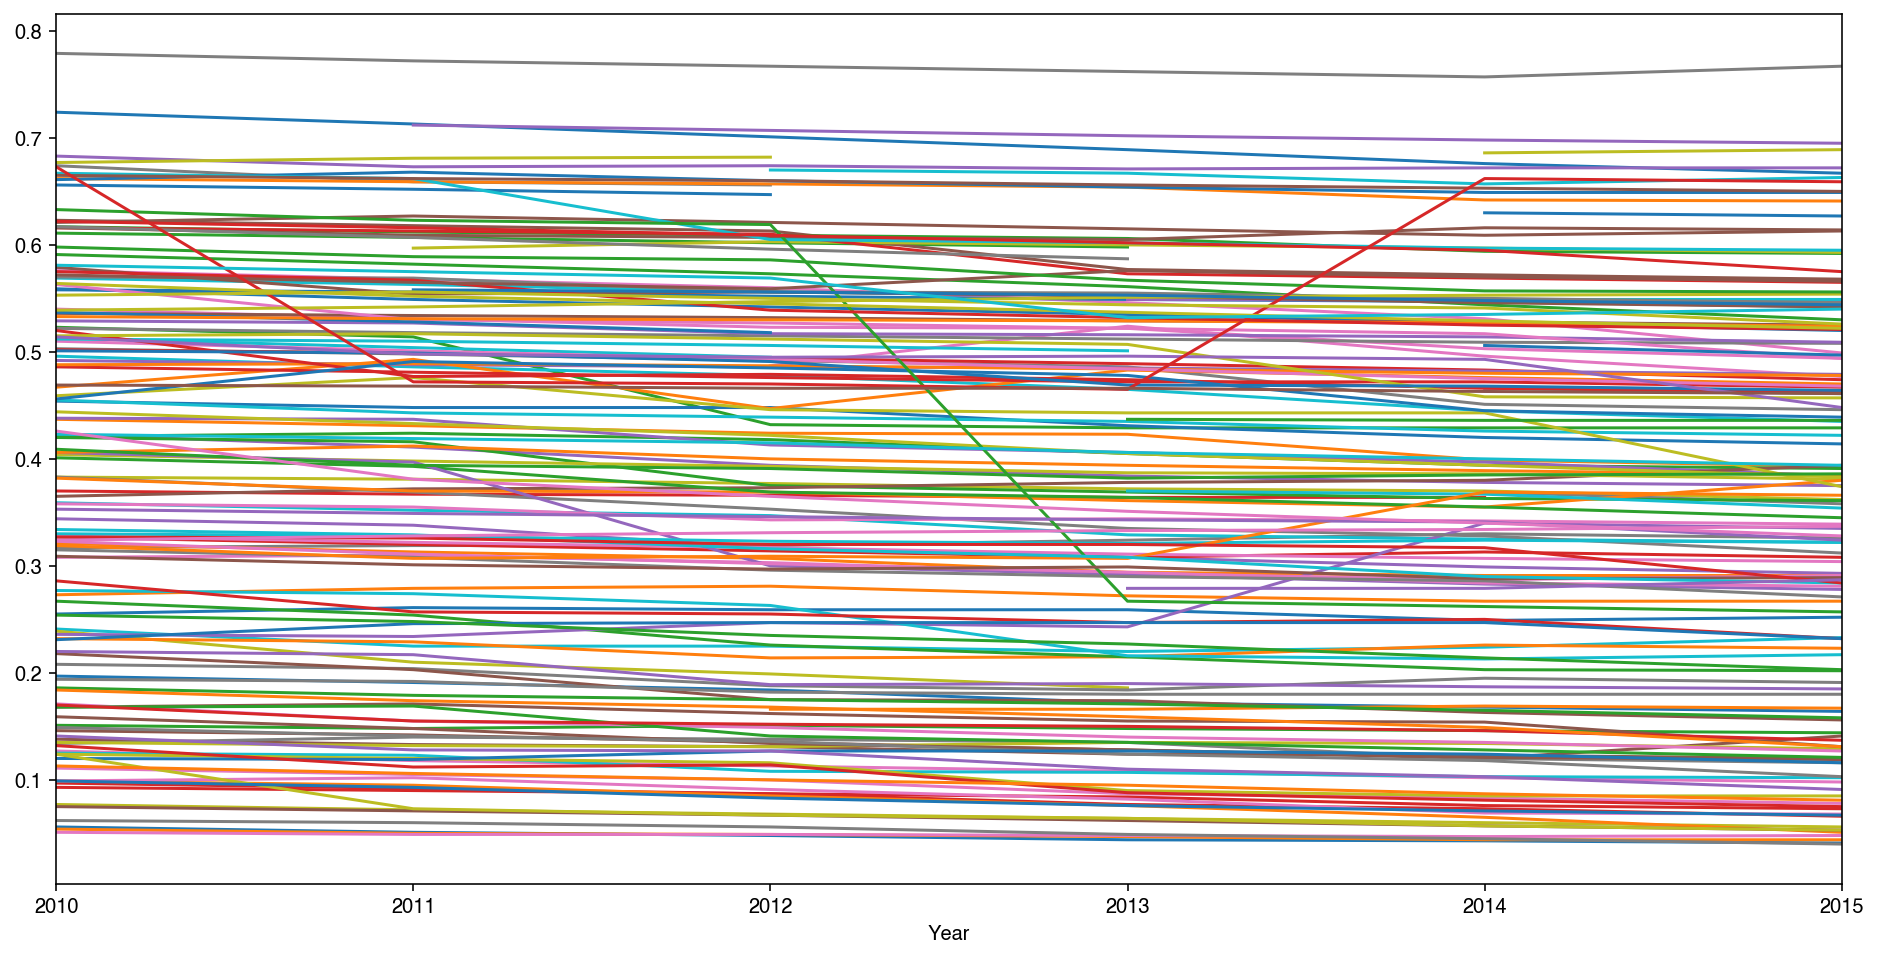

In [11]:
#plotting as is will give us spaghetti 

df.groupby(['Year', 'Entity']).mean().unstack().iloc[3:, :].plot(
                              figsize=(16, 8), legend=False);

In [12]:
#taking only the years from 2010 onwards, so our time axis is equally spaced 

to_plot = df.groupby(['Year', 'Entity']).mean().unstack().iloc[3:]

In [13]:
#getting rid of the multi-level columns
to_plot.columns = to_plot.columns.droplevel()
#dropping multi-level index name 
to_plot.index.name=None
#forward- and then back-filling missing values in the columns so that the data is continuous
to_plot.fillna(method='ffill', inplace=True)
to_plot.fillna(method='bfill', inplace=True)

In [14]:
to_plot

Entity,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
2010,0.724,0.273,0.523,0.370,0.344,0.138,0.111,0.317,0.383,0.241,...,0.231,0.184,0.254,0.327,0.279,0.469,0.324,0.779,0.553,0.581
2011,0.713,0.279,0.514,0.367,0.338,0.133,0.105,0.319,0.381,0.225,...,0.246,0.174,0.248,0.326,0.279,0.468,0.328,0.772,0.556,0.575
2012,0.701,0.281,0.432,0.366,0.317,0.131,0.100,0.319,0.377,0.225,...,0.247,0.168,0.235,0.320,0.279,0.466,0.331,0.767,0.550,0.569
2013,0.689,0.272,0.429,0.364,0.308,0.124,0.087,0.324,0.372,0.220,...,0.247,0.159,0.227,0.320,0.279,0.466,0.333,0.762,0.544,0.532
2014,0.676,0.267,0.429,0.364,0.299,0.123,0.083,0.330,0.370,0.224,...,0.247,0.149,0.214,0.317,0.279,0.463,0.334,0.757,0.541,0.535
2015,0.667,0.267,0.429,0.364,0.293,0.120,0.078,0.326,0.362,0.233,...,0.232,0.131,0.203,0.284,0.287,0.461,0.337,0.767,0.526,0.540


In [15]:
#splitting the data into 4 groups for plotting purposes
#this will allow me to colour the groups separately 

highest = [col for col in to_plot.columns if to_plot[col].mean() > 0.68]
std_dev = [col for col in to_plot.columns if to_plot[col].std() > 0.05]
lowest = [col for col in to_plot.columns if to_plot[col].mean() < 0.07]

rest = [col for col in to_plot.columns if col not in highest 
        and col not in std_dev and col not in lowest]


In [16]:
print(highest) 
print(std_dev)
print(lowest)

['Afghanistan', 'Chad', 'Mali', 'Niger', 'Yemen']
['Kuwait', 'Mongolia', 'Saudi Arabia', 'Tonga']
['Denmark', 'Finland', 'Netherlands', 'Norway', 'Sweden', 'Switzerland']


In [17]:
to_plot[highest]

Entity,Afghanistan,Chad,Mali,Niger,Yemen
2010,0.724,0.695,0.677,0.712,0.779
2011,0.713,0.695,0.681,0.712,0.772
2012,0.701,0.695,0.682,0.707,0.767
2013,0.689,0.695,0.682,0.702,0.762
2014,0.676,0.695,0.686,0.698,0.757
2015,0.667,0.695,0.689,0.695,0.767


In [18]:
highest

['Afghanistan', 'Chad', 'Mali', 'Niger', 'Yemen']

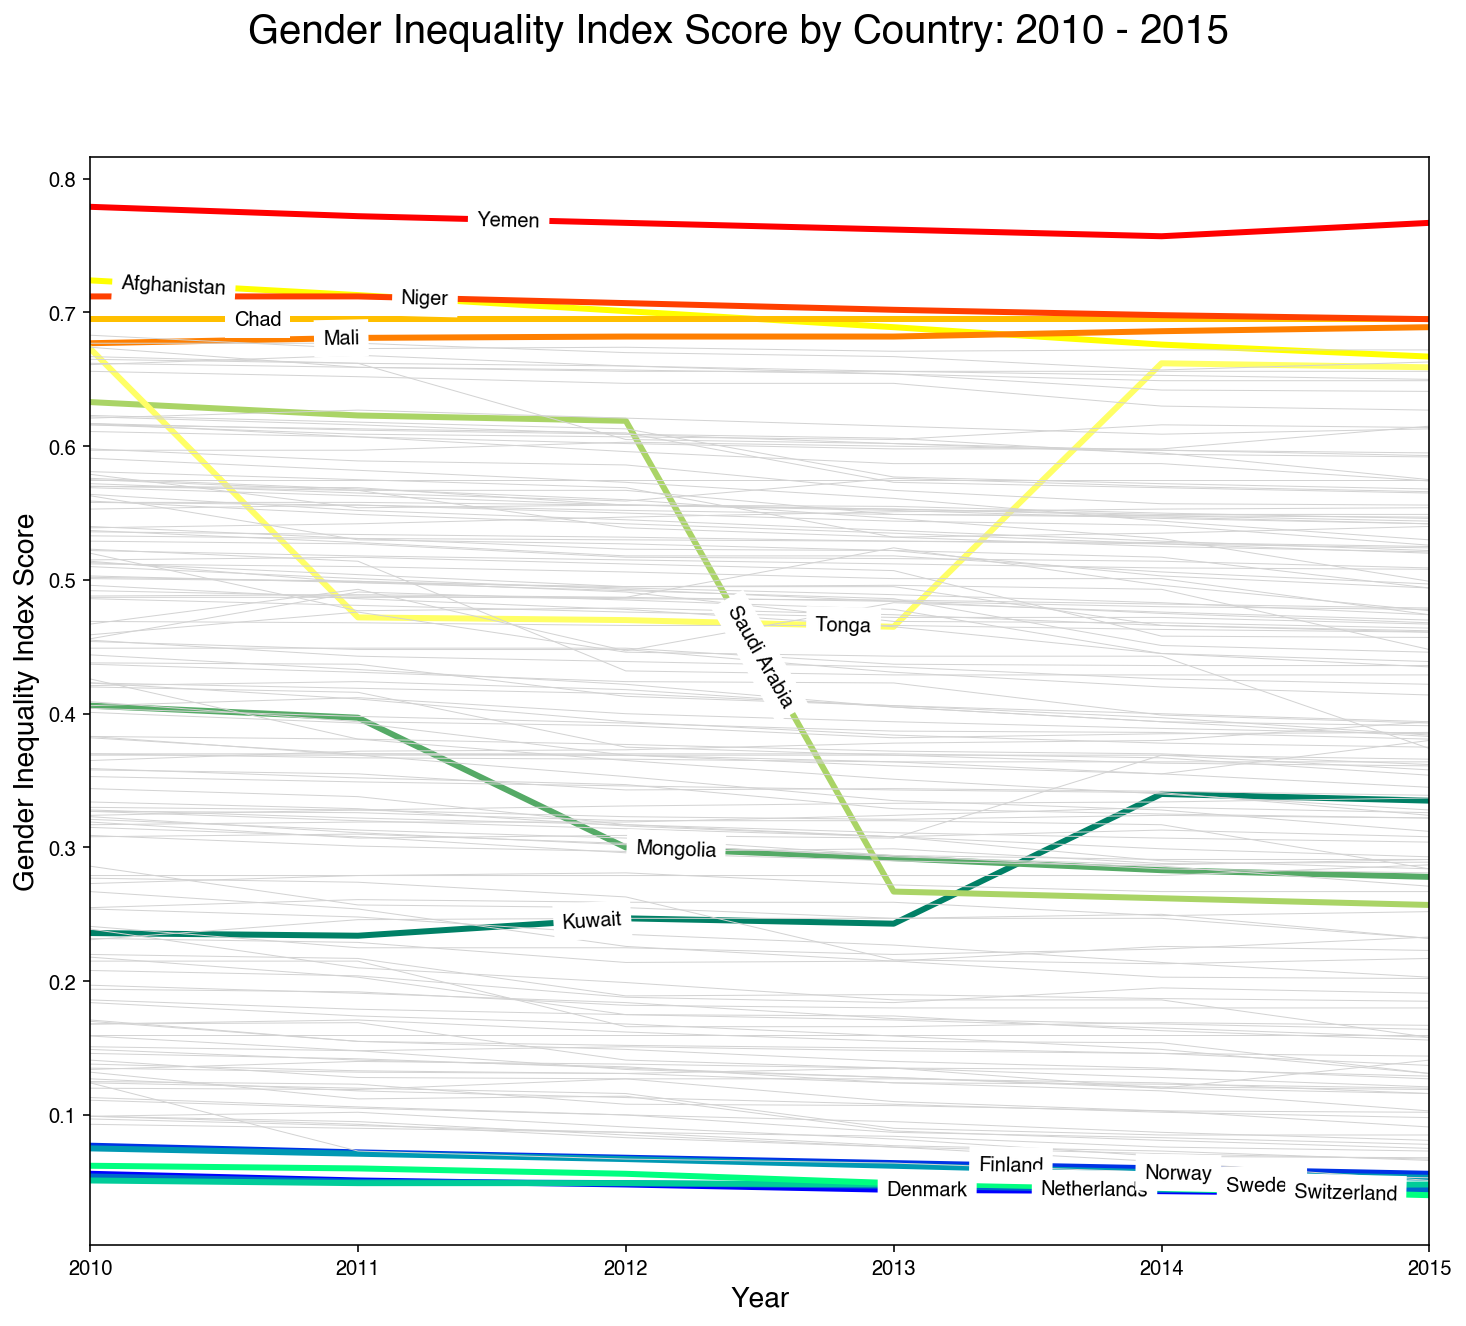

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
to_plot[highest].plot(ax=ax, cmap='autumn_r', lw=3, legend=False)
to_plot[std_dev].plot(ax=ax, cmap='summer', lw=3, legend=False)
to_plot[lowest].plot(ax=ax, cmap='winter', lw=3, legend=False)

plt.suptitle('Gender Inequality Index Score by Country: 2010 - 2015', 
          fontsize=20, fontweight='bold')
plt.title('Higher scores indicate more disparity between males and females', 
          fontsize=20, fontweight='bold')

plt.ylabel('Gender Inequality Index Score', fontsize=14)
plt.xlabel('Year', fontsize=14)

labelLines(plt.gca().get_lines(),zorder=2.5, color='k')

#plotting afterwards to avoid labelling 
to_plot[rest].plot(ax=ax, legend=False, c='lightgrey', lw=0.5)

#plt.savefig('data_and_images/gii_plot.png', dpi=200)
plt.show()
